#Intro to image datasets and tensorflow
- This tutorial is a version of Parag Mital's CADL session 1
- I've fixed it up so that it will run on your systems
- It demonstrates how to make a large dataset of images
- And shows you how to process them easily in NUMPY
- It also shows you how to do simple calculations in tensorflow
- This will really help you understand what is going on when you use TF
- So don't skip it.

In [40]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from PIL import Image

I'll be using a popular image dataset for faces called the CelebFaces dataset.  I've provided some helper functions which you can find on the resources page, which will just help us with manipulating images and loading this dataset. 

# NOTE - If you want to run this more than once, you may want to delete the downloaded images - they will be in the same folder that this notebook is in.

In [59]:
# Load the os library
import os

# Load the request module
import urllib.request

# Import SSL which we need to setup for talking to the HTTPS server
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# Create a directory
try: 
    os.mkdir('img_abstract')

    # Now perform the following 193 times:
    for img_i in range(1,193):

        # create a string using the current loop counter
        f = 'Abstract_image_%03d.png' % img_i

        # and get the url with that string appended the end
        url = 'https://raw.githubusercontent.com/wwdddq/Image/main/' + f

        # We'll print this out to the console so we can see how far we've gone
        print(url, end='\r')

        # And now download the url to a location inside our new directory
        urllib.request.urlretrieve(url, os.path.join('img_abstract', f))
except:
    #os.rm('img_align_celeba')
    print("You may need to delete the existing 'img_align_celeba' folder in your directory")

Let's get the 50th image in this list of files, and then read the file at that location as an image, setting the result to a variable, `img`, and inspect a bit further what's going on:

In [117]:
files = os.listdir('img_abstract')# img.<tab>
import matplotlib.pyplot as plt
import numpy as np

print(os.path.join('img_abstract', files[1]))
plt.imread(os.path.join('img_abstract', files[0]))

files = [os.path.join('img_abstract', file_i)
 for file_i in os.listdir('img_abstract')
 if '.png' in file_i]

# There should be 100 files, with the last one being number 99

img = plt.imread(files[150])

print(img)

img_abstract/Abstract_image_162.png
[[[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 ...

 [[0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  ...
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]]

 [[0.99607843 0.99607843 0.99607843]
 

When I print out this image, I can see all the numbers that represent this image.  We can use the function `imshow` to see this:

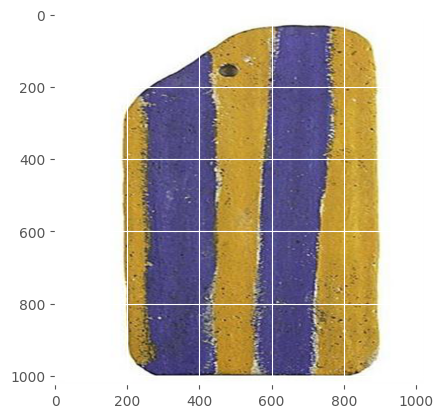

In [118]:
# If nothing is drawn and you are using notebook, try uncommenting the next line:
#%matplotlib inline
plt.imshow(img)

<a name="understanding-image-shapes"></a>
## Understanding Image Shapes

Let's break this data down a bit more.  We can see the dimensions of the data using the `shape` accessor:

In [119]:
img.shape
# (218, 178, 3)

(1024, 1024, 3)

This means that the image has 218 rows, 178 columns, and 3 color channels corresponding to the Red, Green, and Blue channels of the image, or RGB.  Let's try looking at just one of the color channels.

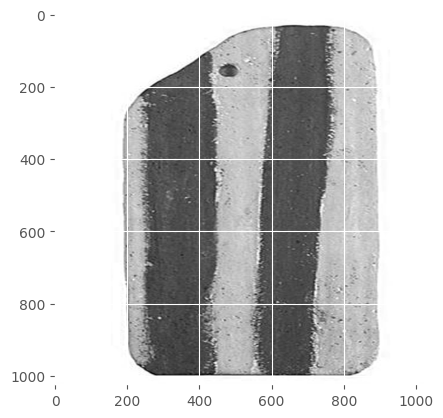

In [120]:
plt.imshow(img[:, :, 0], cmap='gray') # Red Channel

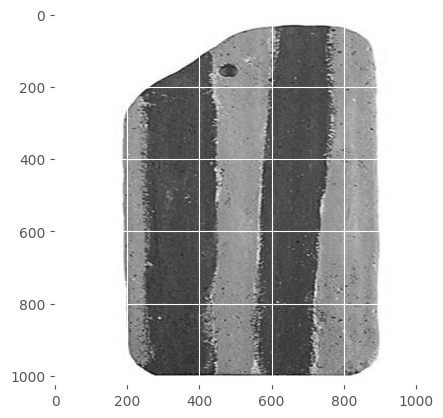

In [121]:
plt.imshow(img[:, :, 1], cmap='gray') # Green Channel

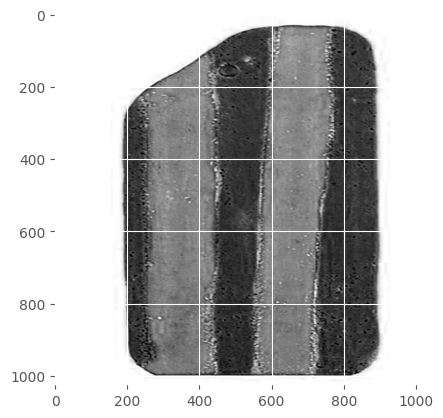

In [122]:
plt.imshow(img[:, :, 2], cmap='gray') # Blue Channel

We use the special colon operator to say take every value in this dimension.  This is saying, give me every row, every column, and the 0th dimension of the color channels.  What we're seeing is the amount of Red, Green, or Blue contributing to the overall color image.

Let's use another helper function which will load every image file in the celeb dataset rather than just give us the filenames like before.  By default, this will just return the first 100 images because loading the entire dataset is a bit cumbersome.  In one of the later sessions, I'll show you how tensorflow can handle loading images using a pipeline so we can load this same dataset.  For now, let's stick with this:

In [123]:
imgs = [plt.imread(files[file_i])
        for file_i in range(23)]

#imgs = utils.get_celeb_imgs() # nope nope nope

We now have a list containing our images.  Each index of the `imgs` list is another image which we can access using the square brackets:

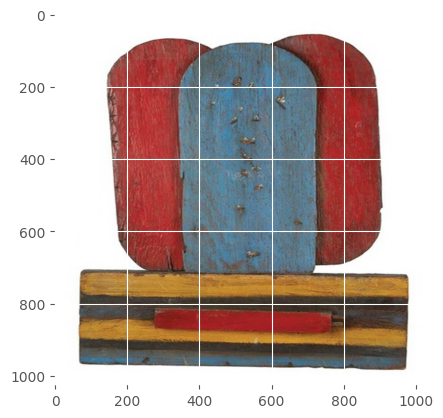

In [111]:
plt.imshow(imgs[20])

<a name="the-batch-dimension"></a>
## The Batch Dimension

Remember that an image has a shape describing the height, width, channels:

In [112]:
imgs[0].shape

(1024, 1024, 3)

It turns out we'll often use another convention for storing many images in an array using a new dimension called the batch dimension.  The resulting image shape will be exactly the same, except we'll stick on a new dimension on the beginning... giving us number of images x the height x the width x the number of color channels.

N x H x W x C

A Color image should have 3 color channels, RGB.

We can combine all of our images to have these 4 dimensions by telling numpy to give us an array of all the images.

In [113]:
data = np.array(imgs) # make 'data' = our numpy array
data.shape
print(data.shape)
print("The shape of our new 'data' object is a 'batch' of 100 images, with a height of 218, width of 178, and 3 colour channels")
print("If your images aren't all the same size to begin with, then this won't work!")

(23, 1024, 1024, 3)
The shape of our new 'data' object is a 'batch' of 100 images, with a height of 218, width of 178, and 3 colour channels
If your images aren't all the same size to begin with, then this won't work!


This will only work if every image in our list is exactly the same size.  So if you have a wide image, short image, long image, forget about it.  You'll need them all to be the same size.  If you are unsure of how to get all of your images into the same size, then please please refer to the online resources for the notebook I've provided which shows you exactly how to take a bunch of images of different sizes, and crop and resize them the best we can to make them all the same size.

<a name="meandeviation-of-images"></a>
## Mean/Deviation of Images

Now that we have our data in a single numpy variable, we can do alot of cool stuff.  Let's look at the mean of the batch channel:

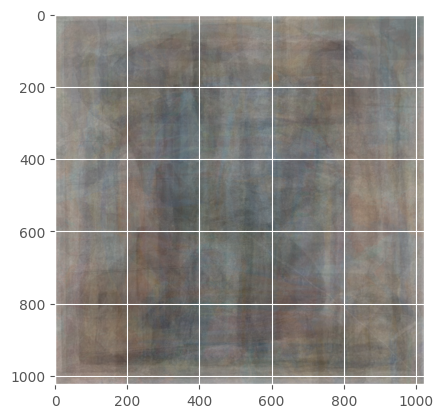

In [114]:
mean_img = np.mean(data, axis=0) # This is the mean of the 'batch' channel
plt.imshow(mean_img)

This is the first step towards building our robot overlords.  We've reduced down our entire dataset to a single representation which describes what most of our dataset looks like.  There is one other very useful statistic which we can look at very easily:

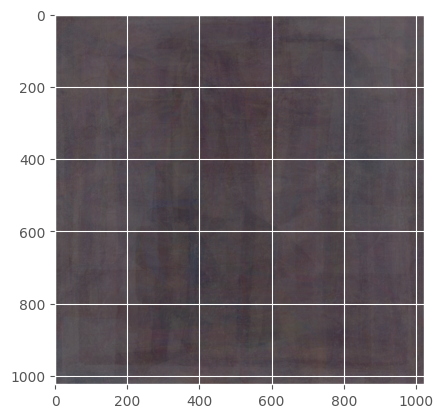

In [115]:
std_img = np.std(data, axis=0)
plt.imshow(std_img)

So this is incredibly cool.  We've just shown where changes are likely to be in our dataset of images.  Or put another way, we're showing where and how much variance there is in our previous mean image representation.

We're looking at this per color channel.  So we'll see variance for each color channel represented separately, and then combined as a color image.  We can try to look at the average variance over all color channels by taking their mean:

Mean of all colour channels


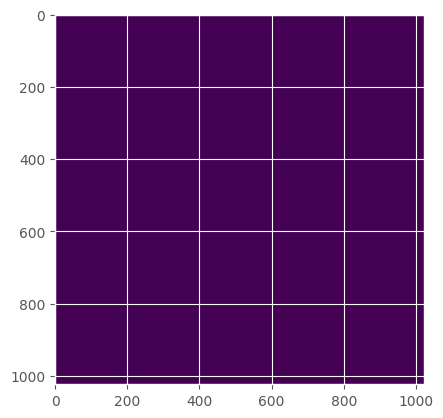

In [116]:
plt.imshow(np.mean(std_img, axis=2).astype(np.uint8)) # Mean of all colour channels
print("Mean of all colour channels")